# <center>Metody Numeryczne</center>

# Laboratorium 5: Równania liniowe MxN


**Wykonał:** \<imię i nazwisko\>
Natalia Lach
<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, w szczególności z wykorzystaniem rzadkich macierzy prostokątnych.

Dana jest prostokątna macierz $\mathbf{A}$ o wymiarach $m \times n$ oraz wektor kolumnowy $\mathbf{b}$ o wymiarach $m \times 1$. Należy rozwiązać układ równań postaci:
 
$$
\mathbf{Ax}=\mathbf{b}
$$
  
gdzie:
- $\mathbf{A}$ - macierz współczynników z lewej strony równania, 
- $\mathbf{x}$ - wektor zmiennych,
- $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania wykorzystywać będziemy residuum (ang. *residual*):

$$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- Do wykonania analizy zużycia pamięci potrzebna jest biblioteka [*memory_profiler*](https://pypi.org/project/memory-profiler/), która do poprawnego działania wymaga doinstalowania pakietu [*setuptools*](https://pypi.org/project/setuptools/). Po instalacji bibliotek może wystąpić błąd związany z brakiem modułu *distutils*. Należy go zignorować i przeładować okno VSCode (lub zrestartować kernela).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [1]:
# !python -m pip install numpy scipy matplotlib memory_profiler setuptools

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

%load_ext memory_profiler

---

### **Zadanie 1.**

Zdefiniuj funkcję *`spare_matrix_Abt()`* generującą wektor $m$-wymiarowy $\mathbf{t}$, którego wartości należą do przedziału $[0,1]$ (za pomocą funkcji [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)). Na podstawie tego wektora funkcja powinna zwracać:
- $\mathbf{b}$ - wektor $m$-wymiarowy, którego wartości dane są funkcją $\cos(4t)$,
- $\mathbf{A}$ - macierz postaci: 

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
$$  

> **Wskazówka:** Do definicji macierzy $\mathbf{A}$ można użyć funkcji [`np.vander()`](https://numpy.org/doc/stable/reference/generated/numpy.vander.html) z odpowiednio dobranymi parametrami.

---

### **Zadanie 2.**

Korzystając z funkcji zaimplementowanej w **Zadaniu 1.**, oraz mając dane $m = 50$ i $n = 12$, rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
\left[
\begin{matrix}
    x_0    \\
    x_1    \\
    x_2    \\
    \vdots \\
    x_{n-1}
\end{matrix}
\right]
=
\left[
\begin{matrix}
    b_0    \\
    b_1    \\
    b_2    \\
    \vdots \\
    b_{m-1}
\end{matrix}
\right]
$$

za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ i stosując funkcję [`np.linalg.solve()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html). Aby wyznaczyć $\mathbf{A}^{\mathrm{T}}\mathbf{A}$ oraz $\mathbf{A}^{\mathrm{T}}\mathbf{b}$ zaimplementuj funkcję *`square_from_rectan()`*.

2. Użycia dedykowanej metody z biblioteki numpy do rozwiązywania problemu najmniejszych kwadratów&mdash;funkcji [`np.linalg.lstsq()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html).  

3. Rozkładu QR podanego na wykładzie i wyznaczenia rozwiązania dla układu równań z macierzą trójkątną. Użyć należy funkcji [`np.linalg.qr()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html) i [`sp.linalg.solve_triangular()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html).

4. Rozkładu SVD podanego na wykładzie. Użyć należy funkcji [`np.linalg.svd()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html).

Po zaimplementowaniu powyższych metod przeprowadź profilowanie kodu w celu analizy czasu wykonania oraz zużycia pamięci każdej z nich. Porównaj jakość otrzymanych wyników.

In [2]:
from main import spare_matrix_Abt, square_from_rectan, residual_norm
import numpy as np
from scipy.linalg import solve_triangular
import time
import tracemalloc
#pierwszy sposób
m,n=50,12
A,b=spare_matrix_Abt(int(m),int(n))
norm = []
time_taken = []
memory = []

# ===== 1. Pierwsza metoda =====
tracemalloc.start()
t0 = time.perf_counter()
x1 = square_from_rectan(A, b)
time_taken.append(time.perf_counter() - t0)
mem1 = tracemalloc.get_traced_memory()[1]
tracemalloc.stop()
memory.append(mem1)
norm.append(residual_norm(A, x1, b))

# ===== 2. Druga metoda =====
tracemalloc.start()
t0 = time.perf_counter()
x2 = np.linalg.lstsq(A, b, rcond=None)[0]
time_taken.append(time.perf_counter() - t0)
mem2 = tracemalloc.get_traced_memory()[1]
tracemalloc.stop()
memory.append(mem2)
norm.append(residual_norm(A, x2, b))

# ===== 3. Trzecia metoda (QR) =====
tracemalloc.start()
t0 = time.perf_counter()
Q, R = np.linalg.qr(A)
b_hat = Q.T @ b
x_qr = solve_triangular(R, b_hat[:n])
time_taken.append(time.perf_counter() - t0)
mem3 = tracemalloc.get_traced_memory()[1]
tracemalloc.stop()
memory.append(mem3)
norm.append(residual_norm(A, x_qr, b))

# ===== 4. Czwarta metoda (SVD) =====
tracemalloc.start()
t0 = time.perf_counter()
U, S, Vt = np.linalg.svd(A, full_matrices=False)
c = U.T @ b
w = c / S
x_svd = Vt.T @ w
time_taken.append(time.perf_counter() - t0)
mem4 = tracemalloc.get_traced_memory()[1]
tracemalloc.stop()
memory.append(mem4)
norm.append(residual_norm(A, x_svd, b))

# ===== Wyniki =====
print("Wyznaczona norma residuum dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {norm[0]:.3e}")
print(f"Druga metoda    :  {norm[1]:.3e}")
print(f"Trzecia metoda  :  {norm[2]:.3e}")
print(f"Czwarta metoda  :  {norm[3]:.3e}")
print("")
print("Czas wykonywania dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {time_taken[0]:.3e} s")
print(f"Druga metoda    :  {time_taken[1]:.3e} s")
print(f"Trzecia metoda  :  {time_taken[2]:.3e} s")
print(f"Czwarta metoda  :  {time_taken[3]:.3e} s")
print("")
print("Użyta pamięć dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {memory[0]} B")
print(f"Druga metoda    :  {memory[1]} B")
print(f"Trzecia metoda  :  {memory[2]} B")
print(f"Czwarta metoda  :  {memory[3]} B")

Wyznaczona norma residuum dla kolejnych metod obliczeń:


TypeError: unsupported format string passed to NoneType.__format__

In [ ]:
# Przykładowa forma zestawienia wyników
print("Wyznaczona norma residuum dla kolejnych metod obliczeń:") 
print(f"Pierwsza metoda :  {norm[0]:.3e}")
print(f"Druga metoda    :  {norm[1]:.3e}")
print(f"Trzecia metoda  :  {norm[2]:.3e}")
print(f"Czwarta metoda  :  {norm[3]:.3e}")
print("")
print("Czas wykonywania dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {str(time[0])[:29]}")
print(f"Druga metoda    :  {str(time[1])[:29]}")
print(f"Trzecia metoda  :  {str(time[2])[:29]}")
print(f"Czwarta metoda  :  {str(time[3])[:29]}")
print("")
print("Użyta pamięć dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {str(memory[0])}")
print(f"Druga metoda    :  {str(memory[1])}")
print(f"Trzecia metoda  :  {str(memory[2])}")
print(f"Czwarta metoda  :  {str(memory[3])}")

Wyznaczona norma residuum dla kolejnych metod obliczeń:
Pierwsza metoda :  6.186e-02
Druga metoda    :  7.999e-09
Trzecia metoda  :  7.999e-09
Czwarta metoda  :  7.999e-09

Czas wykonywania dla kolejnych metod obliczeń:


TypeError: 'module' object is not subscriptable

---

### **Zadanie 3.**

Dane są wydatki ($\mathbf{w}$) oraz dochody ($\mathbf{d}$) dla pewnego gospodarstwa:

$$
\begin{align*}
    \mathbf{w} &= (140, 190, 250, 270, 290, 310, 340, 360, 420, 390)\\
    \mathbf{d} &= (210, 270, 290, 310, 370, 400, 450, 480, 510, 520)
\end{align*}
$$


1. Utwórz regresję liniową zależności wydatków od dochodów.

2. Przeanalizuj jaki jest błąd uzyskanej prostej względem danych. Czy istnieje możliwość uzyskania lepszego wyniku?

> **Wskazówka:** W celu wyznaczenia współczynników wykorzystaj niniejszą informację nt. regresji liniowej [[link](https://en.wikipedia.org/wiki/Simple_linear_regression#Formulation_and_computation)].


In [ ]:
# Dane do Zadania 3.
w = np.array([140, 190, 250, 270, 290, 310, 340, 360, 420, 390])
d = np.array([210, 270, 290, 310, 370, 400, 450, 480, 510, 520])

In [ ]:
#regresja liniowa
w = np.array([140, 190, 250, 270, 290, 310, 340, 360, 420, 390])
d = np.array([210, 270, 290, 310, 370, 400, 450, 480, 510, 520])
X = np.vstack([np.ones(len(w)), w]).T  

beta = np.linalg.inv(X.T @ X) @ (X.T @ d)
print("Współczynniki regresji:", beta)
#analiza błędów
d_pred = X @ beta
residuals = d - d_pred

# Błąd średniokwadratowy (MSE)
MSE = np.mean(residuals**2)

# Błąd średni (średnia reszt)
MEAN_RES = np.mean(np.abs(residuals))

print("MSE:", MSE)
print("MAE:", MEAN_RES)

Współczynniki regresji: [23.08251017  1.20918071]
Współczynniki regresji: [23.08251017  1.20918071]
MSE: 523.7797791981404
MAE: 19.924462521789614


Czy istnieje możliwość uzyskania lepszego wyniku?
<br>
Tak, próbując dopasować regresje nieliniowe, które mogą okazać się dokładniejsze.

---

### **Zadanie 4.**

W rzeczywistych problemach często dokładna postać analityczna analizowanego procesu nie jest znana, a dostępne są jedynie jego dane wejściowe i wyjściowe. W tym zadaniu przeprowadzona zostanie symulacja takiego scenariusza oraz opisany zostanie problem poszukiwania modelu analitycznego jak najdokładniej odzwierciedlającego analizowany proces.

<br>

**Punkt 1. Symulacja danych pomiarowych.**

Zdefiniowany jest rzeczywisty proces opisany następującą zależnością:

$$
y = 2 + x_1 - 0.5x_2 + \epsilon
$$

gdzie:
- $y$ - dane wyjściowe procesu,
- $x_1$, $x_2$ - mierzalne zmienne niezależne, które wpływają na proces,
- $\epsilon$ - zakłócenie procesu.

Należy przygotować dane procesu, które posłużą w Punkcie 2. do jego modelowania.

1. Przy użyciu funkcji [`np.random.normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj wektory kolumnowe danych wejściowych procesu ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz wektor zakłóceń ($\mathbf{\epsilon}$) o wymiarze $(100,1)$. Każdy z nich powinien charakteryzować się średnią równą $0$ oraz odchyleniem standardowym równym $1$.

2. Oblicz wartości wektora $\mathbf{y}$ (dane wyjściowe procesu), korzystając z podanego wzoru opisującego proces oraz wektorów zdefiniowanych w poprzednim podpunkcie.

<br>

**Punkt 2. Modelowanie procesu.**


W Punkcie 1. opisany został rzeczywisty proces, na podstawie którego przygotowane zostały dane do analizy. W tym punkcie natomiast przyjmuje się założenie, że dokładne równanie procesu ($y = ...$) oraz wektor szumów ($\mathbf{\epsilon}$) nie są znane. Danymi, na których przeprowadzone będzie modelowanie, są jedynie wektory danych wejściowych ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz danych wyjściowych ($\mathbf{y}$).

Wszystkie modele używane w ramach tego zadania będą postaci:

$$
\hat{y} \sim a + z_1 + z_2 + ... + z_n
$$

gdzie:
- $\hat{y}$ - przybliżenie modelowanego procesu,
- $a$ - wyraz wolny,
- $z_1 + z_2 + ... + z_n$ - zmienne niezależne, których ilość dobiera się na podstawie dostępnych danych, tak aby otrzymać jak najlepszy model.

Celem zadania jest wyznaczenie wektora współczynników [regresji liniowej](https://en.wikipedia.org/wiki/Linear_regression) $\mathbf{b}$, co sprowadza się do rozwiązania równania:

$$
\mathbf{y} = b_0 \cdot \mathbf{1} + b_1 \mathbf{z}_1 + b_2 \mathbf{z}_2 + ... + b_n \mathbf{z}_{n}
$$

które w postaci macierzowej przybiera postać:

$$
\mathbf{Z} \mathbf{b} = \mathbf{y}
$$

gdzie:
- $\mathbf{Z}$ - macierz rzeczywistych danych wejściowych do procesu,
- $\mathbf{b}$ - wektor współczynników regresji liniowej do wyliczenia,
- $\mathbf{y}$ - wektor rzeczywistych danych wyjściowych z procesu.

<br>

W ramach zadania przeanalizowane i porównane zostaną poniższe modele:
1. $\hat{y} \sim a + x_1$   
2. $\hat{y} \sim a + x_2$
3. $\hat{y} \sim a + x_1 + x_2$
4. $\hat{y} \sim a + x_1 + x_2 + x_1x_2$

Dla każdego z modeli zdefiniowanych powyżej:

1. Rozpisz analitycznie równanie opisujące model, analogicznie jak w opisie powyżej (np. $\mathbf{y} = b_0 \cdot \mathbf{1} + ... $). Opisz co oznaczają poszczególne elementy wzoru. 

2. Przedstaw otrzymane równanie w formie macierzowej i zdefiniuj $\mathbf{Z}$, $\mathbf{b}$ oraz $\mathbf{y}$. Podaj wymiary każdego z nich oraz napisz z czego wynikają.

3. Wyznacz wektor współczynników regresji liniowej ($\mathbf{b}$) wykorzystując rozkład QR.

4. Przedstaw na wykresie rzeczywiste wartości wyjściowe procesu ($\mathbf{y}$) oraz wyznaczoną funkcję regresji (pomiń ten podpunkt dla ostatniego modelu).


Po przeprowadzeniu analizy dla wszystkich modeli przeanalizuj znanymi metrykami otrzymane wyniki i je opisz.


> **Wskazówka:** Macierz $\mathbf{Z}$ składa się z konkatenacji wektorów kolumnowych zmiennych niezależnych oraz wektora kolumnowego wypełnionego jedynkami, odpowiadającego wyrazowi wolnemu w modelu ($\mathbf{Z} = [\mathbf{1}, \mathbf{z}_1, ... , \mathbf{z}_n]$). Do utworzenia takiej macierzy można posłużyć się funkcją [`np.concatenate()`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html).
>
> Płaszczyznę regresji dla trzeciego modelu można wyrysować stosując [`np.meshgrid()`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) oraz [`plot_wireframe()`](https://matplotlib.org/stable/plot_types/3D/wire3d_simple.html).
>
> Rozkład QR w skrócie: dane jest równanie: $\mathbf{A}\mathbf{x} = \mathbf{b}$. Jeżeli zdefiniujemy dodatkowo $\mathbf{A} = \mathbf{Q} \mathbf{R}$ to zachodzi: $\mathbf{R}\mathbf{x} = \mathbf{Q}^T\mathbf{b}$.

x1 shape: (100, 1)
x2 shape: (100, 1)
y shape: (100, 1)
Współczynniki modelu 1: [2.08484357 1.29947668]


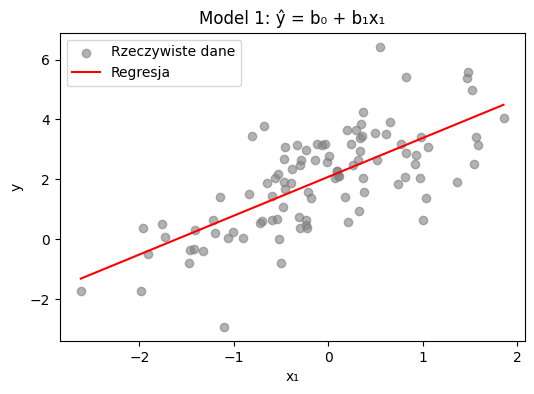

Współczynniki modelu 2: [ 1.96487636 -0.67156217]


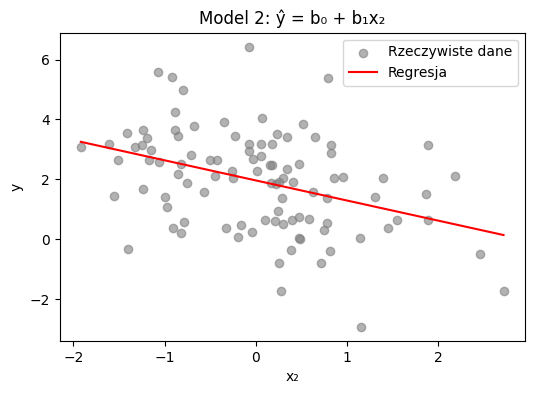

Współczynniki modelu 3: [ 2.08864867  1.22608936 -0.51227678]


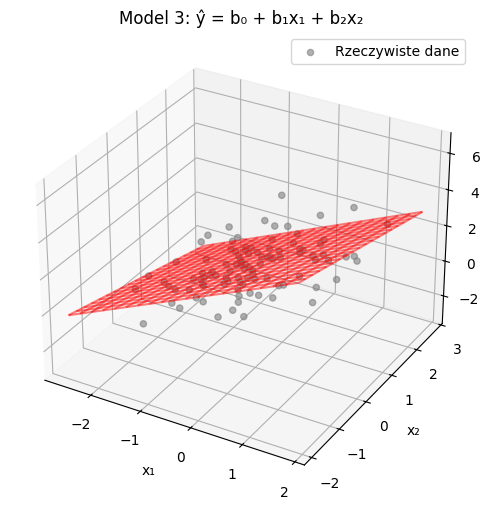

Współczynniki modelu 4: [ 2.08231097  1.24887828 -0.53093472 -0.07645649]
a+x1                 RSS=41109.029, R²=-149.4673
a+x2                 RSS=31381.631, R²=-113.8630
a+x1+x2              RSS=43427.924, R²=-157.9549
a+x1+x2+x1x2         RSS=111.632, R²=0.5914


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_triangular

np.random.seed(42)

# 1. Generacja danych wejściowych
x1 = np.random.normal(0, 1, (100, 1)) 
x2 = np.random.normal(0, 1, (100, 1))
epsilon = np.random.normal(0, 1, (100, 1))

y = 2 + x1 - 0.5 * x2 + epsilon

print("x1 shape:", x1.shape)
print("x2 shape:", x2.shape)
print("y shape:", y.shape)

#model 1
Z1 = np.concatenate((np.ones_like(x1), x1), axis=1)
Q, R = np.linalg.qr(Z1)
b_qr1 = solve_triangular(R, Q.T @ y)

print("Współczynniki modelu 1:", b_qr1.ravel())

y_hat1 = (Z1 @ b_qr1).ravel()

# wykres
plt.figure(figsize=(6,4))
plt.scatter(x1, y, label='Rzeczywiste dane', color='gray', alpha=0.6)
plt.plot(np.sort(x1, axis=0), y_hat1[np.argsort(x1, axis=0)], 'r', label='Regresja')
plt.title("Model 1: ŷ = b₀ + b₁x₁")
plt.xlabel("x₁"); plt.ylabel("y"); plt.legend()
plt.show()

# model 2
Z2 = np.concatenate((np.ones_like(x2), x2), axis=1)
Q, R = np.linalg.qr(Z2)
b_qr2 = solve_triangular(R, Q.T @ y)
print("Współczynniki modelu 2:", b_qr2.ravel())

y_hat2 = (Z2 @ b_qr2).ravel()

# wykres
plt.figure(figsize=(6,4))
plt.scatter(x2, y, label='Rzeczywiste dane', color='gray', alpha=0.6)
plt.plot(np.sort(x2, axis=0), y_hat2[np.argsort(x2, axis=0)], 'r', label='Regresja')
plt.title("Model 2: ŷ = b₀ + b₁x₂")
plt.xlabel("x₂"); plt.ylabel("y"); plt.legend()
plt.show()

# model 3
Z3 = np.concatenate((np.ones_like(x1), x1, x2), axis=1)
Q, R = np.linalg.qr(Z3)
b_qr3 = solve_triangular(R, Q.T @ y)
print("Współczynniki modelu 3:", b_qr3.ravel())

y_hat3 = (Z3 @ b_qr3).ravel()

#wykres
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, color='gray', label='Rzeczywiste dane', alpha=0.6)

# siatka dla płaszczyzny regresji
x1_grid, x2_grid = np.meshgrid(np.linspace(x1.min(), x1.max(), 20),
                               np.linspace(x2.min(), x2.max(), 20))
y_grid = b_qr3[0] + b_qr3[1]*x1_grid + b_qr3[2]*x2_grid
ax.plot_wireframe(x1_grid, x2_grid, y_grid, color='r', alpha=0.5)

ax.set_title("Model 3: ŷ = b₀ + b₁x₁ + b₂x₂")
ax.set_xlabel("x₁"); ax.set_ylabel("x₂"); ax.set_zlabel("y")
plt.legend(); plt.show()

#model 4
x1x2 = x1 * x2
Z4 = np.concatenate((np.ones_like(x1), x1, x2, x1x2), axis=1)
Q, R = np.linalg.qr(Z4)
b_qr4 = solve_triangular(R, Q.T @ y)
print("Współczynniki modelu 4:", b_qr4.ravel())

#porównanie jakości
def model_metrics(y, y_hat):
    rss = np.sum((y - y_hat)**2)
    tss = np.sum((y - np.mean(y))**2)
    r2 = 1 - rss/tss
    return rss, r2

rss = []
r2 = []

for y_hat in [y_hat1, y_hat2, y_hat3, Z4 @ b_qr4]:
    r, r2v = model_metrics(y, y_hat)
    rss.append(r)
    r2.append(r2v)

models = ["a+x1", "a+x2", "a+x1+x2", "a+x1+x2+x1x2"]
for i in range(4):
    print(f"{models[i]:<20} RSS={rss[i]:.3f}, R²={r2[i]:.4f}")

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)